In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn as sk
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [2]:
data_full = pd.read_csv("BankChurners.csv")
data_full

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
data_full["CLIENTNUM"].is_unique

True

In [4]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

For Categorical variables count occurences

In [5]:
cols = data_full.columns

num_cols = data_full._get_numeric_data().columns

In [6]:
categorical_cols = list(set(cols) - set(num_cols))
categorical_cols

['Education_Level',
 'Marital_Status',
 'Income_Category',
 'Gender',
 'Attrition_Flag',
 'Card_Category']

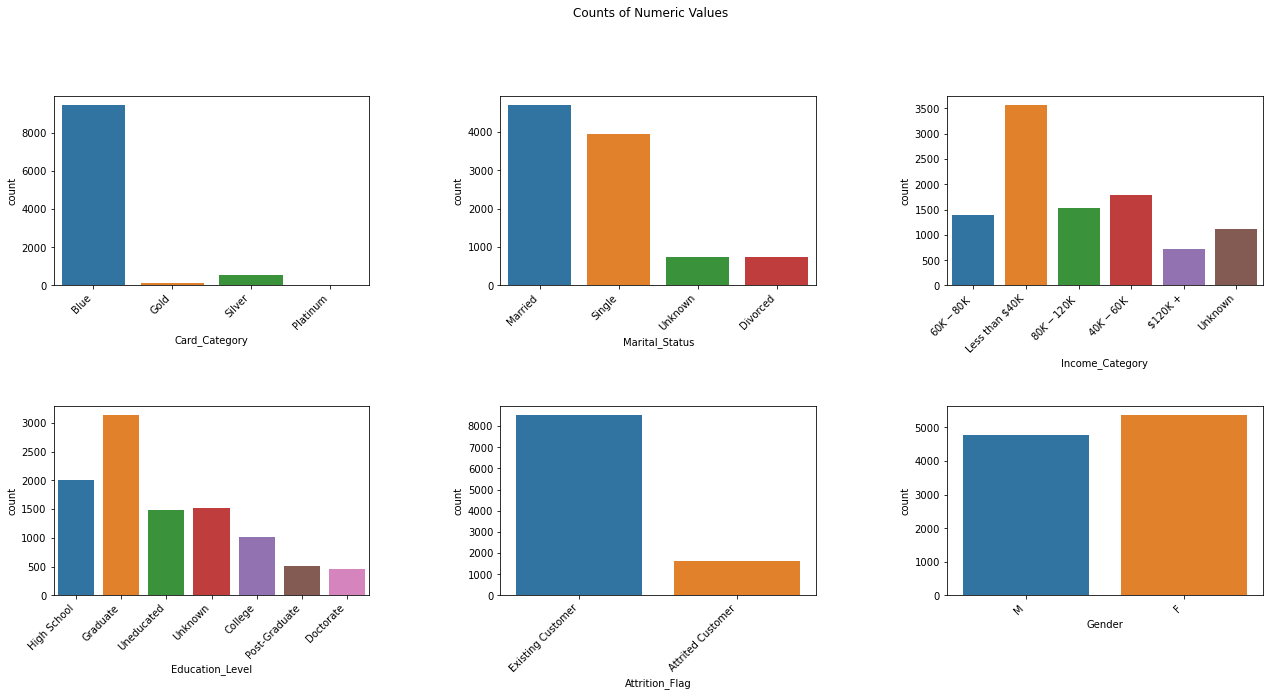

In [7]:
fig, axes = plt.subplots(2, 3,figsize=(20, 10))
fig.tight_layout(pad=10.0)
chart = fig.suptitle('Counts of Numeric Values')


charts = [sns.countplot(ax=axes[0,0], x='Card_Category', data=data_full),
sns.countplot(ax=axes[0,1], x='Marital_Status', data=data_full),
sns.countplot(ax=axes[0,2], x='Income_Category', data=data_full),
sns.countplot(ax=axes[1,0], x='Education_Level', data=data_full),
sns.countplot(ax=axes[1,1], x='Attrition_Flag', data=data_full),
sns.countplot(ax=axes[1,2], x='Gender', data=data_full)]

for chart in charts:
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


Describe numerical data

In [8]:
data_full.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02,0.00,1.00
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,1.00
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50,0.00,1.00
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00


In [10]:
#removing last 2 cols which contians unclear values
df = data_full.iloc[:, :-2]

##  Encoding Categorical Values

In [11]:
#Attrition Flag from text to 0 - Existing Customer, 1 - Attrited Customer
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [12]:
enc = preprocessing.OneHotEncoder()

enc.fit(df.loc[:,['Marital_Status','Gender']])

OneHotEncoder()

In [13]:
enc.categories_

[array(['Divorced', 'Married', 'Single', 'Unknown'], dtype=object),
 array(['F', 'M'], dtype=object)]

In [14]:
data_encoded_OHE_df = pd.DataFrame(enc.transform(df.loc[:,['Marital_Status','Gender']]).toarray(), columns=['Divorced', 'Married', 'Single', 'Martial_Status_Unknown', 'Female', 'Male'])
data_encoded_OHE_df

,Divorced,Married,Single,Martial_Status_Unknown,Female,Male
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
10122,0.0,0.0,1.0,0.0,0.0,1.0
10123,1.0,0.0,0.0,0.0,0.0,1.0
10124,0.0,1.0,0.0,0.0,1.0,0.0
10125,0.0,0.0,0.0,1.0,0.0,1.0


In [15]:
education_order = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']
income_order = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']


enc = preprocessing.OrdinalEncoder(categories = [education_order, card_order, income_order])

data_encoded_ordinal = enc.fit_transform(df.loc[:,['Education_Level', 'Card_Category', 'Income_Category']])

In [16]:
enc.categories_

[array(['Unknown', 'Uneducated', 'High School', 'College', 'Graduate',
        'Post-Graduate', 'Doctorate'], dtype=object),
 array(['Blue', 'Silver', 'Gold', 'Platinum'], dtype=object),
 array(['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K',
        '$80K - $120K', '$120K +'], dtype=object)]

In [17]:
# create a new dataframe with the encoded data
data_encoded_OE_df = pd.DataFrame(data_encoded_ordinal, columns=['Education_Level_OE', 'Card_Category_OE', 'Income_Category_OE'])

In [18]:
# concatenate the original dataframe and the encoded dataframe along columns
df = pd.concat([df, data_encoded_OHE_df], axis=1)
df = pd.concat([df, data_encoded_OE_df], axis=1)

In [19]:
df.drop(columns=['Marital_Status','Gender', 'Education_Level', 'Card_Category', 'Income_Category'], axis=1, inplace=True)

In [20]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Avg_Utilization_Ratio,Divorced,Married,Single,Martial_Status_Unknown,Female,Male,Education_Level_OE,Card_Category_OE,Income_Category_OE
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0.061,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0.105,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,1.0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0.000,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,4.0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0.760,0.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0.000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,2,40,3,2,3,4003.0,1851,...,0.462,0.0,0.0,1.0,0.0,0.0,1.0,4.0,0.0,2.0
10123,710638233,1,41,2,25,4,2,3,4277.0,2186,...,0.511,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
10124,716506083,1,44,1,36,5,3,4,5409.0,0,...,0.000,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
10125,717406983,1,30,2,36,4,3,3,5281.0,0,...,0.000,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,2.0


# Lets balance dataset - Oversampling

In [22]:
# class count
class_count_0, class_count_1 = df['Attrition_Flag'].value_counts()

# Separate class
class_0 = df[df['Attrition_Flag'] == 0]
class_1 = df[df['Attrition_Flag'] == 1]
#print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (8500, 25)
class 1: (1627, 25)


total class of 1 and 0: 1    8500
0    8500
Name: Attrition_Flag, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

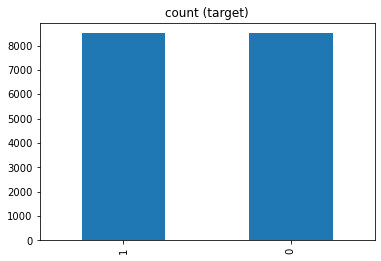

In [23]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Attrition_Flag'].value_counts())# plot the count after under-sampeling
test_over['Attrition_Flag'].value_counts().plot(kind='bar', title='count (target)')

In [24]:
df_over = test_over

## Splitting data - Training and test set

In [25]:
#split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_over.loc[:, df_over.columns != 'Attrition_Flag'], df_over['Attrition_Flag'], test_size=0.3)

# print the training data and target
print("Training data:")
print(X_train)
print("\nTraining target:")
print(Y_train)

# print the test data and target
print("\nTest data:")
print(X_test)
print("\nTest target:")
print(Y_test)

Training data:
      CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
1790  710428308            55                4              51   
3203  711699183            56                2              50   
582   716222808            53                4              36   
6288  772590408            41                5              31   
9074  719714658            61                0              43   
...         ...           ...              ...             ...   
5265  780292683            55                1              41   
3570  778375458            52                3              32   
3533  771776808            44                4              33   
9376  719210133            47                3              35   
7051  713474733            51                2              31   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
1790                         4                       1                      4   
3203                         4

In [26]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)  # apply scaling on training data

lr_score = pipe.score(X_test, Y_test)  # apply scaling on testing data
lr_score

0.852156862745098

In [27]:
pipe = Pipeline(steps=[('standardscaler', StandardScaler()),
        ('randomforestclassifier', RandomForestClassifier())])
pipe.fit(X_train, Y_train)  # apply scaling on training data

rf_score = pipe.score(X_test, Y_test)  # apply scaling on testing data
rf_score

0.983921568627451

In [28]:
pd.DataFrame(data = {'classificator': ['LogisticRegression','RandomForestClassifier' ], 'score': [lr_score, rf_score]}, columns = ["classificator", "score"]).sort_values(by='score', ascending=False)

,classificator,score
1,RandomForestClassifier,0.983922
0,LogisticRegression,0.852157


RandomForesClassifier is a winner in this example :)